In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
%matplotlib inline 
import pylab as pl
np.random.seed(0)  # For reproducibility
from sklearn.decomposition import PCA
pyo.init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.metrics import accuracy_score

C:\Users\thero\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
iris = pd.read_csv(r"C:\Python37\Projects\Iris\Iris.csv")  # Load the data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'},inplace=True)

In [4]:
iris.head(3)

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
#Lets Visualize the Data

In [8]:
px.scatter(iris,x='Species',y='PetalWidth',size='PetalWidth',color='PetalWidth')

In [9]:
#Now in Bar Graph

<BarContainer object of 150 artists>

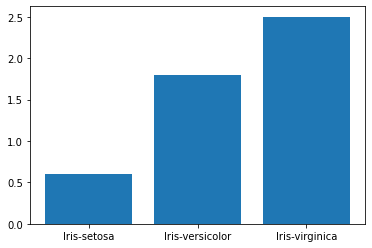

In [10]:
plt.bar(iris["Species"],iris['PetalWidth'])

In [11]:
iris.iplot(kind='bar',x=["Species"],y=['PetalWidth'])

In [12]:
#Line Graph

In [13]:
iris.iplot(kind='line',x=["Species"],y=['PetalWidth'])

In [14]:
px.scatter_matrix(iris,color='Species',title='Iris',dimensions=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"])

In [15]:
#Preprocessing

In [16]:
y = iris['Species']  # Set target variable
X = iris.drop(["Species", "Id"], axis=1)  # Select feature variable 

In [17]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X.shape

(150, 4)

In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [20]:
#LabelEncoding

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Load the label encoder
y = le.fit_transform(y)  # Encode the string target features into integers
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
y.size


150

In [23]:
#One-Hot-Encoding

In [24]:
'''
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(y.reshape(-1,1))
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\n\nencoder = OneHotEncoder(sparse=False)\nencoder.fit_transform(y.reshape(-1,1))\n'

In [25]:
X=np.array(X)

In [26]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)  # Split the dataset into 30% testing, and 70% training 

In [28]:
X_train.size

420

In [29]:
#StandardScaler

In [30]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)  # Load the standard scaler
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


In [31]:
#3. Applying Classification Algorithms on the Iris Dataset 

In [32]:
#Decision Tree

In [33]:
from sklearn import tree
from sklearn.metrics import accuracy_score
# Train the decision tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
accuracy = accuracy_score(y_test, prediction) * 100
print('Decision Tree accuracy | ' + str(round(accuracy, 2)) + ' %.')

Decision Tree accuracy | 97.78 %.


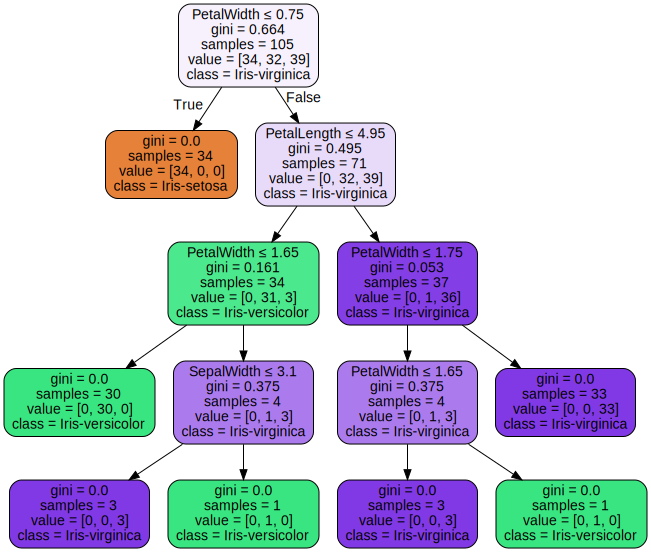

In [34]:
#Lets Visualize the graph
import os
os.environ["PATH"] += os.pathsep + 'C:/Python37/Graph_Viz/bin'
import graphviz 

# Visualize Decision Tree
#X_train = (X_train * X_train.std()) + X_train.mean()
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=iris.drop(["Id", "Species"], axis=1).keys(), class_names=iris["Species"].unique(), filled=True, rounded=True, special_characters=True)  
graphviz.Source(dot_data)  

In [35]:
Catagory=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

In [36]:
X_DT = np.array([[7, 3.2, 4.7, 1.4]])
print("X_new.shape: {}".format(X_DT.shape))



X_new.shape: (1, 4)


In [37]:
prediction_DT=DT.predict(X_DT)

In [38]:
prediction_DT[0]

1

In [39]:
print(Catagory[int(prediction_DT[0])])

Iris-Versicolor


In [40]:
# KNeighborsClassifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)  # Load our classifier
knn.fit(X_train, y_train)  # Fit our model on the training data
prediction = knn.predict(X_test)  # Make predictions with our trained model on the test data 
accuracy = accuracy_score(y_test, prediction) * 100  # Compare accuracy of predicted classes with test data
print('k-Nearest Neighbours accuracy | ' + str(round(accuracy, 2)) + ' %.')  

k-Nearest Neighbours accuracy | 97.78 %.


In [42]:
Catagory=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

In [43]:
#You can directly give flower features also

In [44]:
X_new = np.array([[7.7, 3.8, 6.7, 2.2]])
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [45]:
X_new=sc.transform(X_new)

In [46]:
X_new

array([[2.07024529, 1.71934449, 1.5988273 , 1.25155848]])

In [47]:
prediction2 = knn.predict(X_new)
print("Prediction: {}".format(prediction2))
#print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]


In [48]:
print(int(prediction2))

0


In [49]:
print(Catagory[(int(prediction2))])

Iris-Setosa


In [50]:
#Clustring using K-means

In [51]:
#Visuallisation before fitting

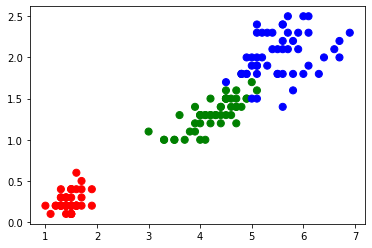

In [52]:
colormap=np.array(['Red','green','blue'])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(iris['PetalLength'],iris['PetalWidth'],
                     c=colormap[y],s=50)

In [53]:
#X=X[:,2:]

In [54]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [116]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [57]:
Catagory=['Iris-Versicolor','Iris-Setosa','Iris-Virginica']

In [58]:
#Visualization after fitting

Text(0, 0.5, 'Sepal Width')

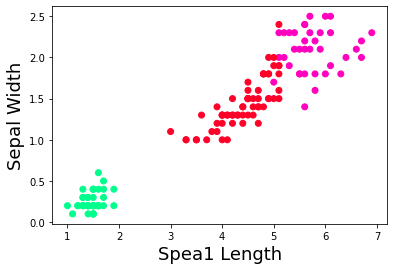

In [60]:
plt.scatter(X[:,2], X[:,3], c=km.labels_, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


Text(0.5, 1.0, 'Predicted')

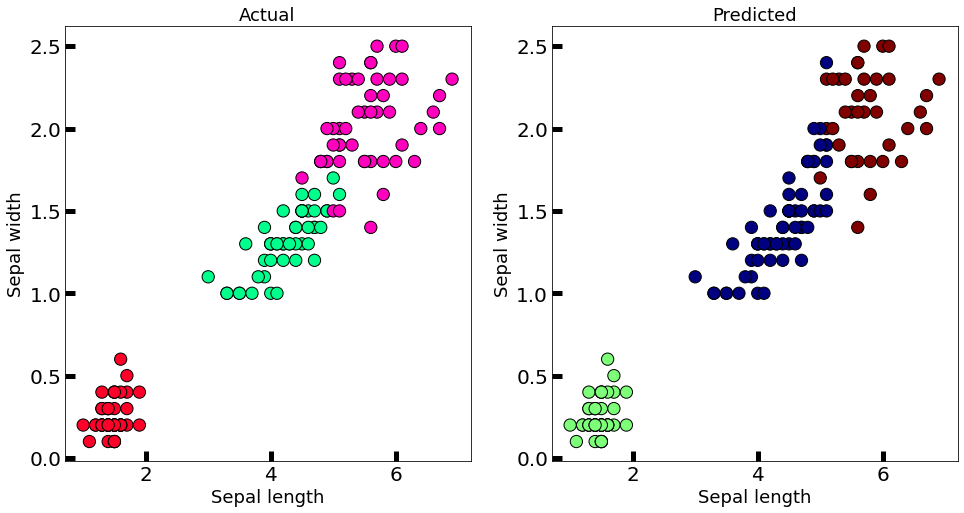

In [61]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


In [106]:
X_new = np.array([[6.9, 3.1, 5.4, 1.8]])
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [108]:
prediction2 = km.predict(X_new)
print("Prediction: {}".format(prediction2))

Prediction: [2]


In [109]:
print(Catagory[(int(prediction2))])

Iris-Virginica
